# <center> Flower Recognition Through CNN Keras

# Pre - Requisites

* Logisitic Regression - https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/
* Overfitting and Underfittting - https://www.analyticsvidhya.com/blog/2020/02/underfitting-overfitting-best-fitting-machine-learning/
* Deep Learning 
* Forward Propogation 
* Gradient Decscent 
* Back Propogation

In [33]:
%%time

## Scalability limitations with ANN
im_size=1024* 1024*3
im_size
(im_size*512 + 512) + (512*100 + 100) + (100 + 1)

CPU times: total: 0 ns
Wall time: 0 ns


1610664649

# Reference Blogs

* **TensorFlow Payground -** http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.68420&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

* **Softmax Ativation Function -** https://stats.stackexchange.com/questions/233658/softmax-vs-sigmoid-function-in-logistic-classifier


### DL/CNN Tutorials 

* **Getting Started with Neural Networks -** https://courses.analyticsvidhya.com/courses/take/getting-started-with-neural-networks/quizzes/11776978-quiz-sequential-modeling
* **Convolutional Neural Networks (CNN) from Scratch -** https://courses.analyticsvidhya.com/courses/take/convolutional-neural-networks-cnn-from-scratch/texts/10846922-transforming-the-data

* **Practical Deep Learning for Coders -** https://course19.fast.ai/

* **Making neural nets uncool again-** https://www.fast.ai/


### Interactive CNN

* **Interactice Convolution Neural Network on MNIST -** https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html

* **Interactive CNN with CIFAR-10 dataset -** https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

* **Toy 2D data set classification using CNN -** https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html

### Blogs to follow for Computer Vision

* **Computer Vision for Dummies -** https://www.visiondummy.com/

* **Learn OpenCV -** https://www.learnopencv.com/

* **Tombone's CV blog -** https://www.computervisionblog.com/

* **Andrez Karpathy Blog -** http://karpathy.github.io/

* **AI Shack Blog -** https://aishack.in/

* **Computer Vision Talks -** https://computer-vision-talks.com/

### Difference Between CPU and GPU by NVIDIA - https://www.youtube.com/watch?v=-P28LKWTzrI

In [34]:
PATH = "../../"

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

DATASETPATH = PATH + "Kaggle/Kaggle 5/flowers/"
print(os.listdir(DATASETPATH))

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


## CONTENTS ::

[ **1 ) Importing Various Modules**](#content1)

[ **2 ) Preparing the Data**](#content2)

[ **3 ) Modelling**](#content3)

[ **4 ) Evaluating the Model Performance**](#content4)

[ **5 ) Visualizing Predictons on the Validation Set**](#content5)

---

<a id="content1"></a>
# 1. Importing Required Libraries

In [36]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [37]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [38]:
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [39]:
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

In [40]:
#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

In [41]:
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [42]:
# #configure
# # sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
# style.use('fivethirtyeight')
# sns.set(style='whitegrid',color_codes=True)


import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [43]:
tf.config.set_visible_devices([], 'GPU')

# if tf.test.gpu_device_name(): # this lies and tells you about all devices
if tf.config.experimental.list_logical_devices('GPU'):
    print('GPU found')
else:
    print("No GPU found")

No GPU found


<a id="content2"></a>
# 2. Data Preparation

## A. Making the functions to get the training and validation set from the Images

In [44]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR = DATASETPATH + 'daisy'
FLOWER_SUNFLOWER_DIR = DATASETPATH + 'sunflower'
FLOWER_TULIP_DIR = DATASETPATH + 'tulip'
#FLOWER_DANDI_DIR = DATASETPATH + '/dandelion'
FLOWER_ROSE_DIR = DATASETPATH + 'rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))  

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 397.74it/s]

764


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:02<00:00, 315.59it/s]

1497


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 365.25it/s]

2481


In [ ]:
# make_train_data('Dandelion',FLOWER_DANDI_DIR)
# print(len(X))

In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:02<00:00, 361.74it/s]

3265


In [ ]:
print(len(X))
print(len(Z))
print(set(Z))

3265
3265
{'Tulip', 'Sunflower', 'Daisy', 'Rose'}


## B. Visualize some Random Images

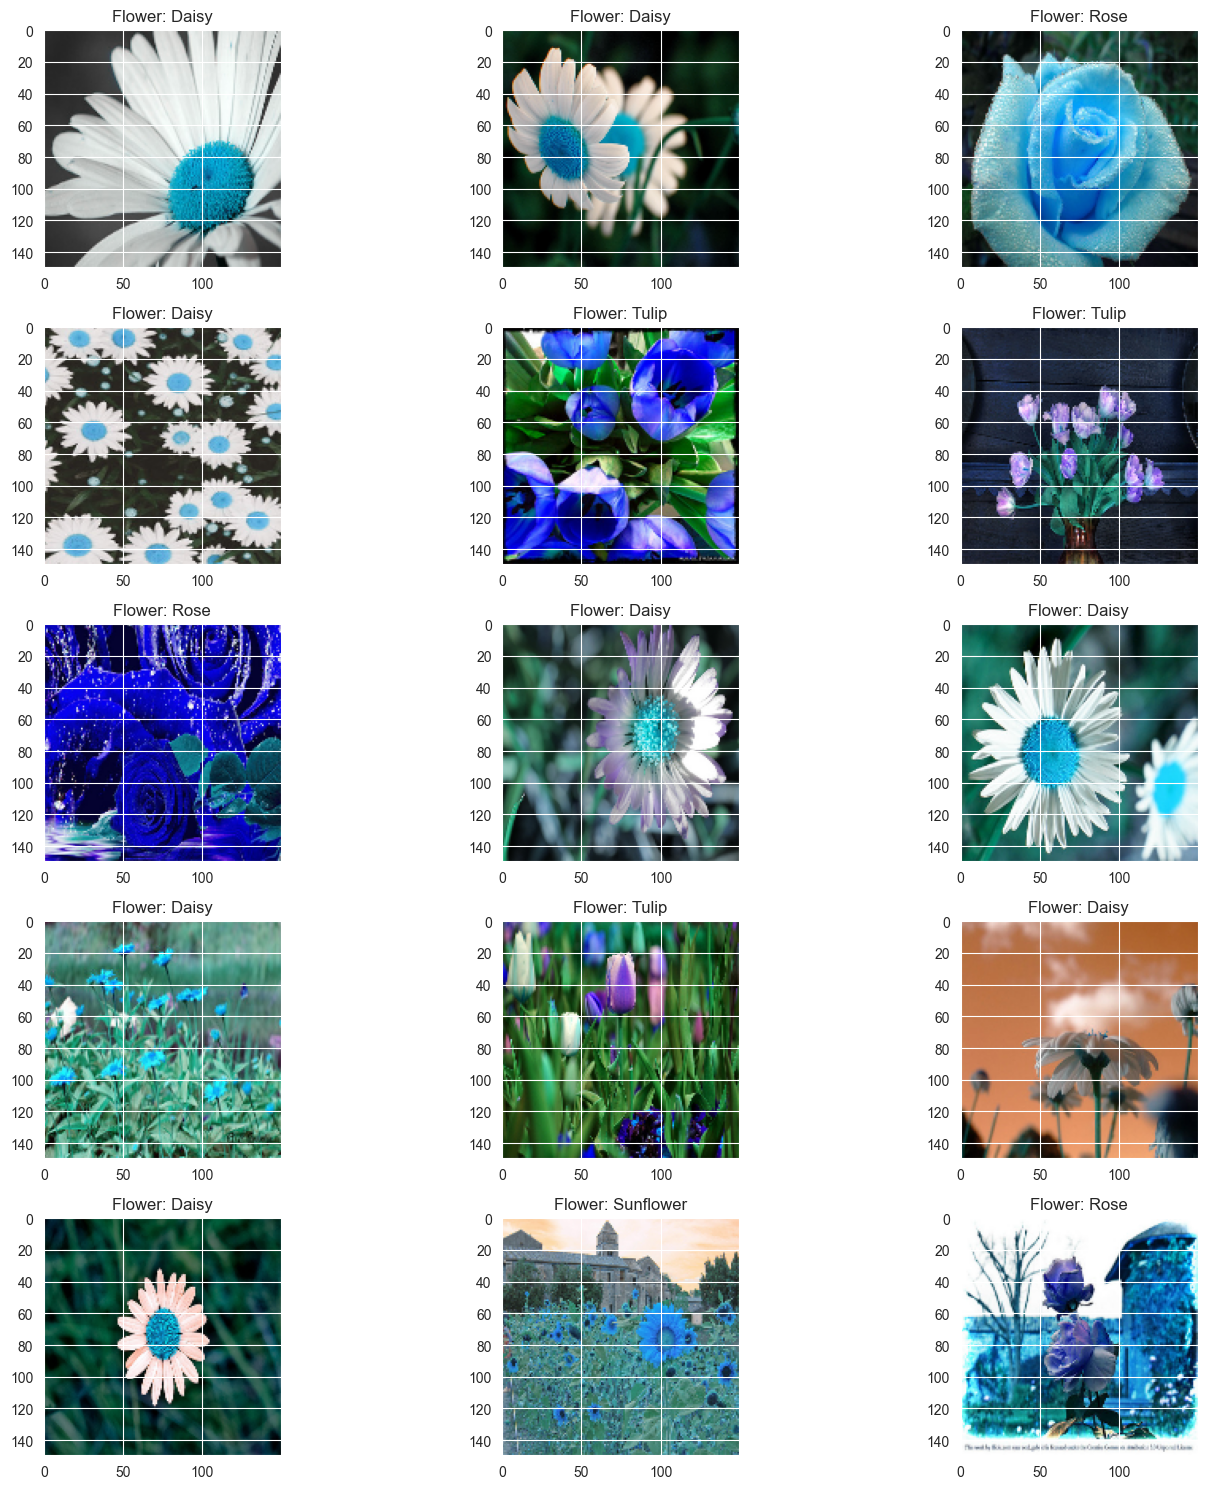

In [ ]:
fig,ax=plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (3):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout();       

In [ ]:
print("Number of Pixles in each image :",150*150*3)

Number of Pixles in each image : 67500


## C. Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,4)
print(Y.shape)

(3265, 4)


In [ ]:
print(type(X))
print(len(X))
print(X[1].shape)

<class 'list'>
3265
(150, 150, 3)


In [ ]:
X_NEW=np.array(X)
# Image Standardization [Scale 0-1]
X_NEW=X_NEW/255

## D. Splitting into Training and Test Sets

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_NEW,Y,test_size=0.20,random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test)
#np.shape(X_val),np.shape(y_val)

((2612, 150, 150, 3), (2612, 4), (653, 150, 150, 3), (653, 4))

## E. Setting the Random Seeds

In [ ]:
np.random.seed(42)
rn.seed(42)
# tf.set_random_seed(42)

<a id="content3"></a>
# 3. Modelling

## A. Building the CNN Model

In [ ]:
9*64*32 + 64

18496

In [ ]:
# # modelling starts using a CNN.


# Initialising the CNN classifier
model = Sequential()

# Add a Convolution layer with 32 kernels of 5X5 shape with activation function ReLU
model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (150,150,3)))

# Add a Max Pooling layer of size 2X2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

# Add another Convolution layer with 96 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flattening the layer before fully connected layers
model.add(Flatten())

# Adding a fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))

# The final output layer with 5 neuron to predict the categorical classifcation
model.add(Dense(4, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

> ## B. Compiling the Keras Model & Summary

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

## C. Fitting on the Training set and making predcitons on the Validation set

In [ ]:
batchSize=256
ep=21
history = model.fit(X_train,y_train,batch_size=batchSize,epochs=ep,validation_split=.15)

Epoch 1/21
9/9 [==============================] - 33s 3s/step - loss: 2.1925 - accuracy: 0.2833 - val_loss: 1.3484 - val_accuracy: 0.2730
Epoch 2/21
9/9 [==============================] - 24s 3s/step - loss: 1.2256 - accuracy: 0.3950 - val_loss: 1.2181 - val_accuracy: 0.4643
Epoch 3/21
9/9 [==============================] - 24s 3s/step - loss: 1.0282 - accuracy: 0.5586 - val_loss: 1.1628 - val_accuracy: 0.5051
Epoch 4/21
9/9 [==============================] - 25s 3s/step - loss: 0.9252 - accuracy: 0.6176 - val_loss: 1.1363 - val_accuracy: 0.5128
Epoch 5/21
9/9 [==============================] - 24s 3s/step - loss: 0.8696 - accuracy: 0.6324 - val_loss: 1.0726 - val_accuracy: 0.5408
Epoch 6/21
9/9 [==============================] - 23s 3s/step - loss: 0.8147 - accuracy: 0.6680 - val_loss: 0.9885 - val_accuracy: 0.5944
Epoch 7/21
9/9 [==============================] - 23s 3s/step - loss: 0.7746 - accuracy: 0.6811 - val_loss: 0.9160 - val_accuracy: 0.6403
Epoch 8/21
9/9 [==================

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test,y_test)

<a id="content4"></a>
## D. Evaluating the Model Performance

In [ ]:
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'])
plt.plot(range(len(history.history['loss'])),history.history['loss'])
plt.title('Model- Accuracy Vs Loss')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'Valid'])
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'Valid'])
plt.show()

<a id="content5"></a>
## E. Visualizing Predictons on the Validation Set

In [ ]:
# getting predictions on val set.
pred=model.predict(X_test)
print("Predicted Probabilities -\n",pred[:4])
pred_digits=np.argmax(pred,axis=1)
print("\nPredicted Class [Highest Prob] -",pred_digits[:4])

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

### CORRECTLY CLASSIFIED FLOWER IMAGES

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]])
        aux = prop_class[count]
        predicted = [pred_digits[aux]]
        predicted = le.inverse_transform(predicted)
        label = [y_test[aux]]
        label = [np.argmax(label)]
        label = le.inverse_transform(label)
        ax[i,j].set_title("Predicted Flower : "+
                          str(predicted[0])+
                          "\n"+"Actual Flower : "+
                          str(label[0])
                         )
        plt.tight_layout()
        count+=1

### MISCLASSIFIED IMAGES OF FLOWERS

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]])
        aux = mis_class[count]
        predicted = [pred_digits[aux]]
        predicted = le.inverse_transform(predicted)
        label = [y_test[aux]]
        label = [np.argmax(label)]
        label = le.inverse_transform(label)
        ax[i,j].set_title("Predicted Flower : "+
                          str(predicted[0])+
                          "\n"+"Actual Flower : "+
                          str(label[0])
                         )
        plt.tight_layout()
        count+=1

# <center> Data Augmentation to Prevent Overfitting [Bonus -1]

1. How to Configure Image Data Augmentation in Keras - https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [ ]:
# # modelling starts using a CNN.


# Initialising the CNN classifier
model = Sequential()

# Add a Convolution layer with 32 kernels of 5X5 shape with activation function ReLU
model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (150,150,3)))

# Add a Max Pooling layer of size 2X2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

# Add another Convolution layer with 96 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flattening the layer before fully connected layers
model.add(Flatten())

# Adding a fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))

# The final output layer with 5 neuron to predict the categorical classifcation
model.add(Dense(4, activation = "softmax"))

model.summary()

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#datagen.fit(X_train)
dtAug=datagen.flow(X_train,y_train)

In [ ]:
dtAug

In [ ]:
History = model.fit_generator(dtAug,epochs = ep,verbose = 1,use_multiprocessing=True, steps_per_epoch=X_train.shape[0] // batchSize,validation_data=(X_test,y_test))

Epoch 1/21


Exception in thread Thread-7 (_run):
Traceback (most recent call last):
  File "C:\Users\Python310\lib\threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "C:\Users\Python310\lib\threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\albam\.virtualenvs\tensorflow_cpu\lib\site-packages\keras\utils\data_utils.py", line 777, in _run
    with closing(self.executor_fn(_SHARED_SEQUENCES)) as executor:
  File "C:\Users\albam\.virtualenvs\tensorflow_cpu\lib\site-packages\keras\utils\data_utils.py", line 752, in pool_fn
    pool = get_pool_class(True)(
  File "C:\Users\Python310\lib\multiprocessing\context.py", line 119, in Pool
    return Pool(processes, initializer, initargs, maxtasksperchild,
  File "C:\Users\Python310\lib\multiprocessing\pool.py", line 212, in __init__
    self._repopulate_pool()
  File "C:\Users\Python310\lib\multiprocessing\pool.py", line 303, in _repopulate_pool
    return self._repopulate_pool_static(self._ctx, sel

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['acc'])
plt.title('Model Loss Vs Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'])
plt.show()

# <center> Transfer Learning [Bonus - 2]

* **A Comprehensive Guide to Transfer Learning -** https://www.kaggle.com/rajmehra03/a-comprehensive-guide-to-transfer-learning

* **CNN Architectures : VGG, ResNet, Inception + TL -** https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl
    
* **VGG16 – Convolutional Network for Classification and Detection -** https://neurohive.io/en/popular-networks/vgg16/

# VGG16

VGG16 was publised in 2014 and is one of the simplest (among the other cnn architectures used in Imagenet competition). It's Key Characteristics are:

* The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes
*  This network contains total __16 layers__ in which weights and bias parameters are learnt.
*  A total of 13 convolutional layers are stacked one after the other and 3 dense layers for classification.
* This network is a pretty large network and it has about __138 million__ (approx) parameters.
* The number of filters in the convolution layers follow an increasing pattern (similar to decoder architecture of autoencoder).
* The informative features are obtained by max pooling layers applied at different steps in the architecture.
* The dense layers comprises of 4096, 4096, and 1000 nodes each.
*  The cons of this architecture are that it is slow to train and produces the model with very large size.

**The VGG16 architecture is given below:**

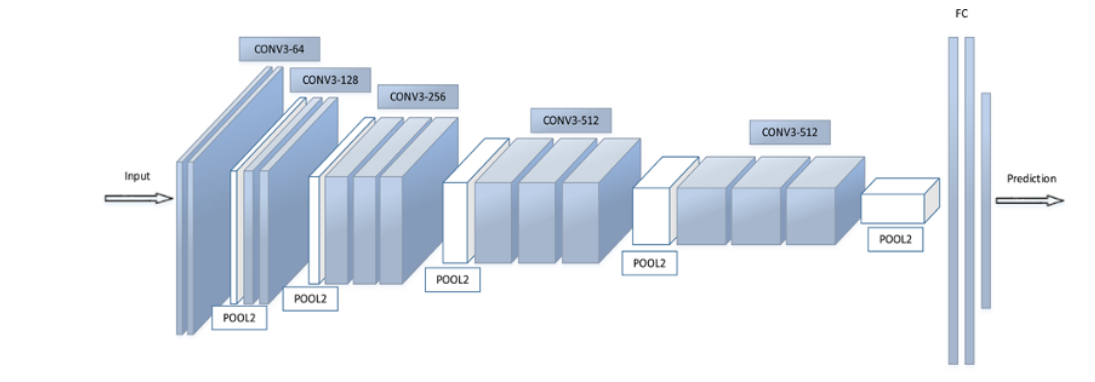

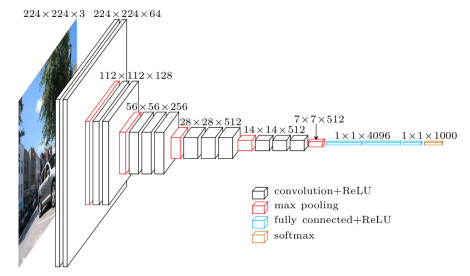

In [ ]:
#Transfer Learning specific modules
from keras.applications.vgg16 import VGG16

In [ ]:
base_model=VGG16(include_top=False, weights=None,input_shape=(150,150,3), pooling='avg')

In [ ]:
import os
print(os.listdir('/kaggle/input/trans-learn-weights/'))

In [ ]:
weights_path='../input/trans-learn-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
base_model.load_weights(weights_path)

In [ ]:
base_model.summary()

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dense(512,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

In [ ]:
base_model.trainable=True # setting the VGG model to be untrainable.

In [ ]:
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batchSize),
                              epochs = ep,use_multiprocessing=True,
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batchSize)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['acc'])
plt.title('Model Loss Vs Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'])
plt.show()